In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv('/content/titanic.csv')
df

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,Survived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1305,1306,39.0,108.9000,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,0
1306,1307,38.5,7.2500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1307,1308,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   zero         1309 non-null   int64  
 6   zero.1       1309 non-null   int64  
 7   zero.2       1309 non-null   int64  
 8   zero.3       1309 non-null   int64  
 9   zero.4       1309 non-null   int64  
 10  zero.5       1309 non-null   int64  
 11  zero.6       1309 non-null   int64  
 12  Parch        1309 non-null   int64  
 13  zero.7       1309 non-null   int64  
 14  zero.8       1309 non-null   int64  
 15  zero.9       1309 non-null   int64  
 16  zero.10      1309 non-null   int64  
 17  zero.11      1309 non-null   int64  
 18  zero.12      1309 non-null   int64  
 19  zero.1

In [6]:
zero_cols=[col for col in df.columns if 'zero' in col]
df=df.drop(columns=zero_cols)
df

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0
...,...,...,...,...,...,...,...,...,...
1304,1305,28.0,8.0500,0,0,0,3,2.0,0
1305,1306,39.0,108.9000,1,0,0,1,0.0,0
1306,1307,38.5,7.2500,0,0,0,3,2.0,0
1307,1308,28.0,8.0500,0,0,0,3,2.0,0


/tmp/ipython-input-958517169.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_rate.index, y=survival_rate.values, palette="viridis")


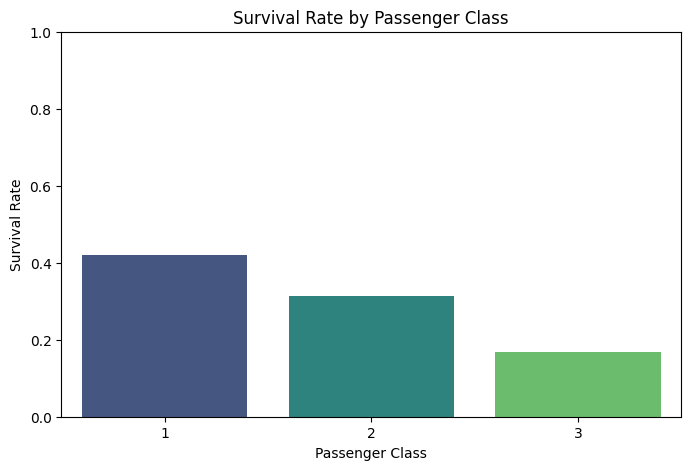

In [11]:
#2
survival_rate = df.groupby('Pclass')['Survived'].mean()

plt.figure(figsize=(8,5))
sns.barplot(x=survival_rate.index, y=survival_rate.values, palette="viridis")
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.ylim(0, 1)
plt.show()


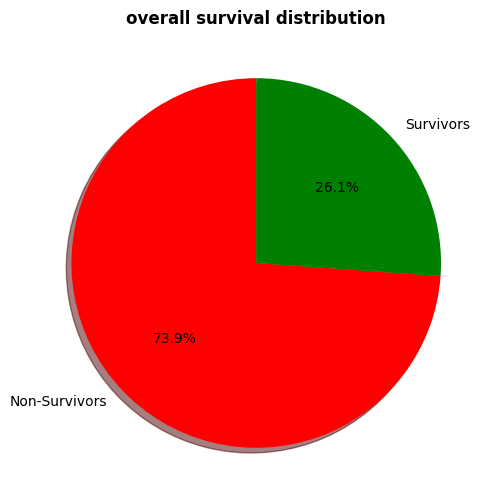

In [15]:
#3
survival_counts = df['Survived'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(survival_counts,
        labels=['Non-Survivors', 'Survivors'],
        autopct='%1.1f%%',
        colors=['red', 'green'],startangle=90,shadow=True)
plt.title("overall survival distribution",fontweight='bold')
plt.show()


<Figure size 1000x600 with 0 Axes>

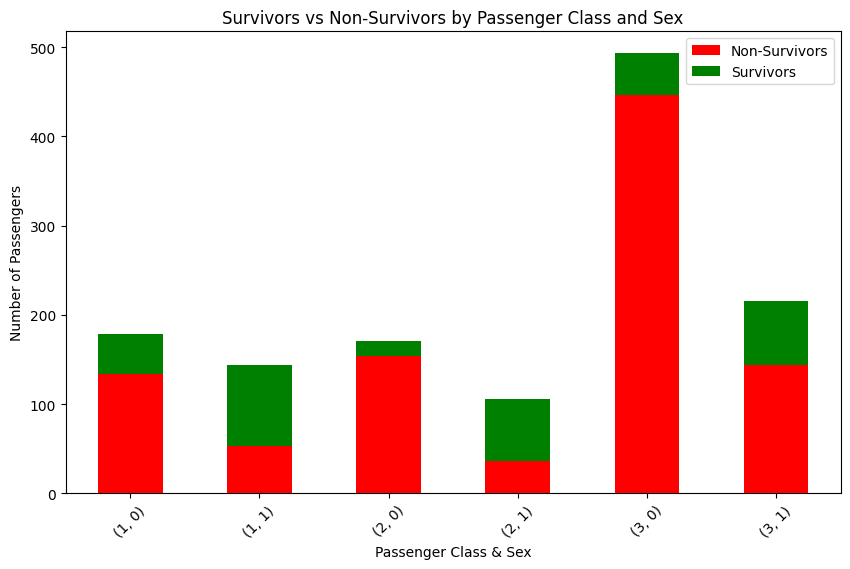

In [16]:
#4
stacked_data = df.groupby(['Pclass', 'Sex', 'Survived']).size().unstack(fill_value=0)

plt.figure(figsize=(10,6))
stacked_data.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(10,6))

plt.title("Survivors vs Non-Survivors by Passenger Class and Sex")
plt.xlabel("Passenger Class & Sex")
plt.ylabel("Number of Passengers")
plt.xticks(rotation=45)
plt.legend(["Non-Survivors", "Survivors"])
plt.show()
